<p> <font face="Verdana">
    Image contains thousands of colors. Goal: reduce to _k_ colors. <br>
    Cluster each pixel around a selected number of _k_ centroids = colors. <br>
    After finding the top _k_ colors, re-color each pixel with the color of its centroid. <br>
    </font>
    </p>

In [1]:
#import needed libraries
from PIL import Image
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np
#NOTE: matplotlib only supports PNG 


<p><font face="Verdana">
    helper functions: <br>
    randomly initiaize centroids with <font face="Monospace">initCentroids(X,k)</font> <br>
    find closest centroid with <font face="Monospace">findClosest(X,centroids)</font><br>
    assign new centroids wiht <font face="Monospace">assignNew(X,idx,k)</font> <br>
    run k-means with <font face="Monospace">runKMeans(X,initial_centroids,max_iters)</font><br>
    </font>
    </p>

In [2]:
def initCentroids(X,k):
    '''
    randomly initialize k centroids to run
    k-means on data in X
    '''
    X_size = np.shape(X)
    centroids = np.zeros(shape=(k,X_size[1]))
    
    #create an array containing a random permutation of data examples (ie pixels)
    randix = np.random.permutation(X_size[0])
    #take the first k random examples as centroids
    centroids = X[randix[0:k],:]
    return centroids

In [3]:
def findClosest(X,centroids):
    '''
    go over every example, find its closes centroid
    return idx
    idx[i] = centroid (ie data point) closest to exmaple i
    '''
    centroids_size = np.shape(centroids)
    k = centroids_size[0]
    X_size = np.shape(X)
    
    #initialize array of indices of closest centroids
    idx = np.zeros(shape=(X_size[0],1))
    
    m = X_size[0]
    for i in range(0,m):
        minimum = float('inf');
        for j in range(0,k):
            #for each example X(i) find distance to each centroid
            t = (np.linalg.norm(X[i,:] - centroids[j,:]))**2
            #find min distance and store idx[i] = centroid closest to exmaple i
            if t < minimum:
                minimum = t
                idx[i] = j
    return idx          

In [4]:
def assignNew(X,idx,k):
    '''
    go over every centroid
    new centorid = mean of all points belonging to it    
    '''
    #initialize return variables
    size_X = np.shape(X)
    new_centroids = np.zeros(shape=(k,size_X[1]))
    
    for j in range(0,k):
        #loop over all centreoids
        #find examples that belong to centroid j
        centroid_is_j = idx == j
        i = np.where(centroid_is_j)[0]
        i_size = np.shape(i)
        #add them all up and divide by their number
        new_centroids[j,:] = sum(X[i]/i_size[0])
    return new_centroids

In [5]:
def runKMeans(X, initial_centroids,max_iters):
    '''
    runs K means on data X, each row = exmaple
    out: centroids and idx, where
    idx[i] = centroid closest to example i
    
    '''
    #initialize values
    X_size = np.shape(X)
    m = X_size[0];n = X_size[1];
    initial_centroids_size = np.shape(initial_centroids)
    k = initial_centroids_size[0]
    centroids = np.copy(initial_centroids)
    previous_centroids = np.copy(centroids)
    
    #run k-means for max_iters
    for i in range(0,max_iters):
        #print progress
        print('K-Means iteration '+str(i+1)+'/'+str(max_iters))
        #for each example in X, assign it to the closest centroid
        idx = findClosest(X,centroids)
        #given the memberships, compute new centroids
        centroids = assignNew(X,idx,k)
        
    out = {'centroids':centroids,'idx':idx} 
    return out

<font face="Verdana">Prepare the image.
    </font>

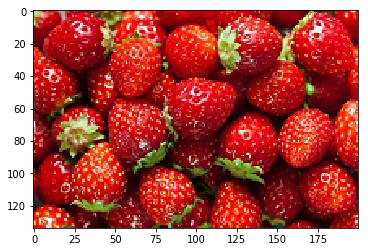

im dimension: (134, 200, 3)
X dimension: (26800, 3)


In [6]:
#load the image

im = np.array(Image.open('strawberry.jpg'))
np.shape(im)
implt = plt.imshow(im)
plt.show()

im_size = np.shape(im)
print('im dimension: '+str(im_size))

#reshape the image into an N x im_size[2] matrix, where N is the # of pixels, then each column is for R G B
X = np.reshape(im,(im_size[0]*im_size[1],im_size[2]))
print('X dimension: '+str(np.shape(X)))

#all values should be in range 0 -1
X = X/255


<font face="Verdana">image is loaded into <font face="Monospace">im<br>
    im[0][0]</font> is the pixel at position (0,0). this is an array<br>
    containing 3 numbers, each one is the shade of red, green and blue respectively<br>
    range 0 - 255, uint8 (8 bit unsigned integer)<br>
    <font face="Monospace">X</font> is the matrix of data points (pixels) <br>
    X is n by 3, n = #of pixels, so width x height, scale to range 0 -1
    </font>
    

In [7]:
#running K-means
k = 6;
max_iters = 10;

#initialize centroids
initial_centroids = initCentroids(X,k);#k by 3 matrix

<font face="Verdana">Running K-Means: <br>
1. find closest centroid (euclidean distance) to a data point (pixel), store at idx[i]<br>
so if idx[0] = 2... 1st pixel is closest to 2nd centroid, <br>
    this creates a cluster of points assigned to a centroid<br>
2. assign new centroid to a cluster - mean of current points <br>
 </font>

In [8]:
#run k-means
out = runKMeans(X,initial_centroids,max_iters);
#out is a dictionary, keys: centroids (k main colors) and idx 

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


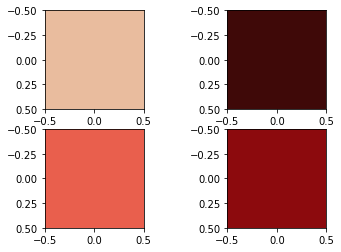

In [9]:
#show 4 main colors 
fig = plt.figure()
plt.subplot(221)
plt.imshow(np.reshape(out['centroids'][0],(1,1,3)))

plt.subplot(222)
plt.imshow(np.reshape(out['centroids'][1],(1,1,3)))


plt.subplot(223)
plt.imshow(np.reshape(out['centroids'][2],(1,1,3)))


plt.subplot(224)
plt.imshow(np.reshape(out['centroids'][3],(1,1,3)))


plt.show()


<font face="Verdana">now that we have the _k_ main colors, <br>
    run findClosest, to assign each pixel in the image to <br>
    one of the main color that it's closest to
</font>

In [10]:
idx = findClosest(X,out['centroids'])

<font face="Verdana">elements of idx can't be used as indices, so turn idx into a list of integers</font>

In [11]:
n = np.shape(idx)[0]
idx_list = [];
for j in range(0,n):
    idx_list.append(int(idx[j][0]))
    

<font face="Verdana">
    build the compressed image X_new<br>
    recolor each pixel of X with its centroid <br>
    and reshape it back to (width,height,3)
</font>

In [12]:
X_new = out['centroids'][idx_list,:]
X_new = X_new
X_new = np.reshape(X_new,(im_size[0],im_size[1],im_size[2]))


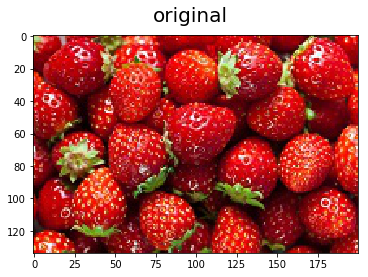

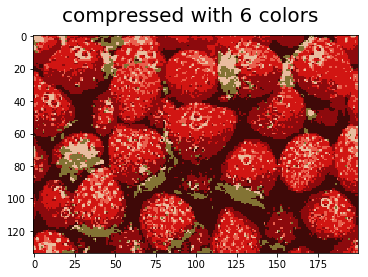

In [13]:
original = plt.figure()
original.suptitle('original', fontsize=20)
plt.imshow(im)
plt.show()

compressed = plt.figure()
compressed.suptitle('compressed with '+str(k)+' colors',fontsize=20)
plt.imshow(X_new)
plt.show()